In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
print(bike_sharing.metadata) 
  
# variable information 
print(bike_sharing.variables) 


{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'ID': 422, 'type': 'NATIVE', 'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'venue': 'Progress

In [3]:
!pip install pandas
!pip install scikit-learn

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
# Step 1: Import libraries
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Fetch the dataset from UCI
bike_sharing = fetch_ucirepo(id=275)

# Step 3: Get features and targets as pandas DataFrames
X = bike_sharing.data.features
y = bike_sharing.data.targets

# OPTIONAL: Preview data
print("Features preview:\n", X.head())
print("Target preview:\n", y.head())

# Step 4: Choose columns for linear regression
# We'll use numeric and meaningful predictors
selected_features = [
    'temp',         # Normalized temperature
    'hum',          # Normalized humidity
    'windspeed',    # Normalized wind speed
    'season',       # Categorical: 1=winter,...,4=fall
    'hr',           # Hour of the day
    'workingday'    # Binary: 1 = working day, 0 = not
]

# Step 5: Prepare features and target variable
X_model = X[selected_features]
y_model = y['cnt']  # total bike rentals

# Step 6: Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=42)

# Step 7: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Predict on the test set
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Step 10: Show coefficients
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
})
print("\nFeature Coefficients:")
print(coefficients)

Features preview:
        dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  
0  0.24  0.2879  0.81        0.0  
1  0.22  0.2727  0.80        0.0  
2  0.22  0.2727  0.80        0.0  
3  0.24  0.2879  0.75        0.0  
4  0.24  0.2879  0.75        0.0  
Target preview:
    cnt
0   16
1   40
2   32
3   13
4    1
Mean Squared Error: 20806.89
R² Score: 0.3429

Feature Coefficients:
      Feature  Coefficient
0        temp   289.161396
1         hum  -226.213629
2   windspeed    11.102629
3      season    20.894700
4          hr     7.4

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features again
features = ['temp', 'hum', 'windspeed', 'season', 'hr', 'workingday']
X_model = X[features]
y_model = y['cnt']

# Categorical columns to one-hot encode
categorical_features = ['season', 'hr', 'workingday']
numeric_features = ['temp', 'hum', 'windspeed']

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  # keep numeric columns as-is
)

# Create pipeline
pipeline = make_pipeline(preprocessor, LinearRegression())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Improved Model:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Improved Model:
Mean Squared Error: 12153.57
R² Score: 0.6162


In [13]:
from sklearn.ensemble import RandomForestRegressor

# Use one-hot encoded data for Random Forest too
pipeline_rf = make_pipeline(
    preprocessor,
    RandomForestRegressor(n_estimators=100, random_state=42)
)

# Fit and predict
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")


Random Forest Model:
Mean Squared Error: 6290.24
R² Score: 0.8014


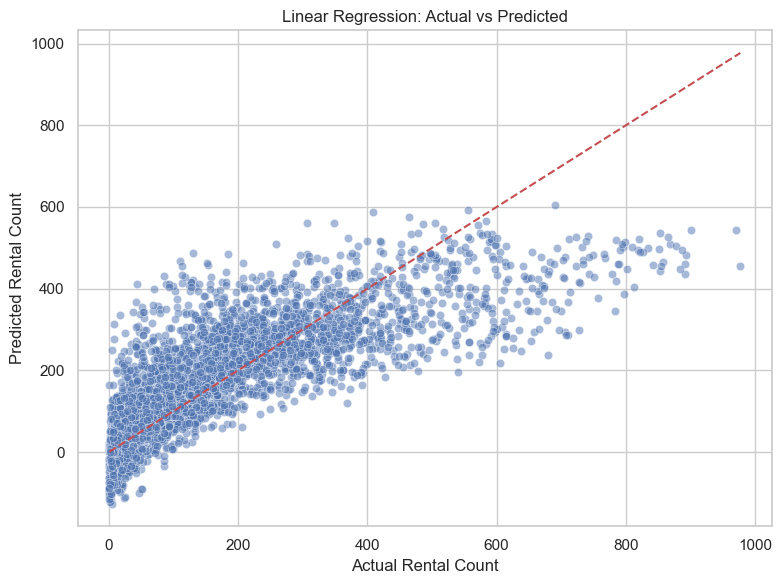

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")

# --- For Linear Regression Model ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Rental Count")
plt.ylabel("Predicted Rental Count")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal
plt.tight_layout()
plt.show()

# Linear Regression: Actual vs Predicted

## Overview

This scatter plot visualizes the performance of a linear regression model by comparing the actual bike rental counts (y_test) with the model’s predicted values (y_pred). Each point represents one prediction, while the red dashed diagonal indicates perfect predictions where actual equals predicted.

## Insights:

The model shows a generally strong upward trend, indicating that it has learned meaningful patterns from the data. 

However, there is visible underprediction at higher rental counts, as many points fall below the diagonal line. This suggests that the model struggles to fully capture peak demand, likely due to its linear nature. 

While the R² score of 0.6162 reflects moderate predictive power, the spread in higher-value predictions indicates room for improvement — particularly by exploring nonlinear models or engineering more informative features.

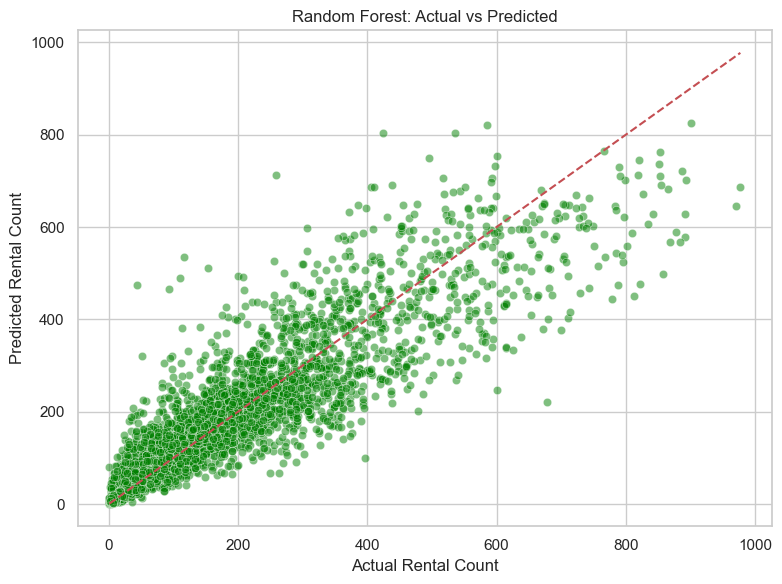

In [16]:
# Set plotting style
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, color='green')
plt.xlabel("Actual Rental Count")
plt.ylabel("Predicted Rental Count")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

# Random Forest: Actual vs Predicted

## Overview

This scatter plot compares the actual bike rental counts (y_test) with the predicted counts from a Random Forest regression model (y_pred). Each green point represents a single prediction, and the red dashed diagonal line represents perfect predictions where actual and predicted counts are equal.

## Insights:

The plot shows a strong alignment along the diagonal, indicating that the Random Forest model captures the underlying data patterns more effectively than a linear model. 

Predictions are more accurate across both low and high rental counts, with less systematic underprediction at peak values. 

Although some variance and scatter remain, particularly at higher rental counts, the model demonstrates improved predictive power and robustness, making it better suited to modeling the complex, nonlinear relationships in bike rental demand.


# Linear Regression Model vs. Random Forest Model

The Random Forest model captures more complex, nonlinear relationships in the data that the Linear Regression model misses. While the linear model tends to systematically underpredict higher rental counts and struggles with variability during peak demand, the Random Forest’s predictions align more closely with actual values across the entire range. This is visible in the tighter clustering of points along the ideal diagonal in the Random Forest plot, especially at higher counts, indicating better handling of peaks and irregular patterns. Essentially, the Random Forest uncovers patterns and interactions among features that a simple linear model cannot, resulting in improved accuracy and reduced bias in predictions.